# Project IART Class - COVID-19 mobility reports - Part 4

## Machine Learning Analysis - Regression problems

## Fifth regression problem: predicting fatalities

Considering everythin we have learned from the previous results and analysis, we are going to predict the number of fatalities using all the features from the mobility records, the IBP, the ranking of the efficience of the health system and also the temporal features used in the Fourth Problem not only for the total_cases but also  for the fatalities. We will also delete the entries of the countries with very low fatalities (less than 100 in the last date), as they prejudice the training and results.

In [1]:
#Main imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sys
import os

#Import modules for models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model #linear_model.SGDRegressor()
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn import tree #tree.DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


#Import modules for metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
code_path=os.getcwd()
data_path=code_path.replace('code','data')
print("Code path : ",code_path)
print("Data path : ",data_path)

Code path :  /home/fatimab/IART_classes/COVID-19/code
Data path :  /home/fatimab/IART_classes/COVID-19/data


In [3]:
os.chdir(data_path)
covid_data=pd.read_csv("data_2.csv",na_values=["NA"])
os.chdir(code_path)
countries_column=np.array(covid_data.loc[:,"country"])
countries=np.unique(countries_column)
days=np.arange(43)
days_column=np.tile(days,countries.shape[0])
covid_data.loc[:,"date"]=days_column
covid_data.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities,total_cases_1m,fatalities_1m,pib,health_system_efficiency
0,AR,Argentina,0,8.185,17.563,0.437,13.644,5.334,-2.486,0,0,0.0,0.0,519487,0.722
1,AR,Argentina,1,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0,0.0,0.0,519487,0.722
2,AR,Argentina,2,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0,0.0,0.0,519487,0.722
3,AR,Argentina,3,2.304,5.399,-2.273,0.845,9.461,12.584,0,0,0.0,0.0,519487,0.722
4,AR,Argentina,4,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0,0.0,0.0,519487,0.722


In [4]:
cases_previous_7days=[]
cases_previous_8days=[]
cases_previous_9days=[]
cases_previous_10days=[]
cases_previous_11days=[]
cases_previous_12days=[]
cases_previous_13days=[]

for i in range(0,len(covid_data.date)):
  if covid_data.date[i]<=13: 
    cases_previous_7days.append(-1) 
    cases_previous_8days.append(-1) 
    cases_previous_9days.append(-1) 
    cases_previous_10days.append(-1) 
    cases_previous_11days.append(-1) 
    cases_previous_12days.append(-1) 
    cases_previous_13days.append(-1) 
  else:
    cases_previous_7days.append(covid_data.total_cases_1m[i-7])
    cases_previous_8days.append(covid_data.total_cases_1m[i-8])
    cases_previous_9days.append(covid_data.total_cases_1m[i-9])
    cases_previous_10days.append(covid_data.total_cases_1m[i-10])
    cases_previous_11days.append(covid_data.total_cases_1m[i-11])
    cases_previous_12days.append(covid_data.total_cases_1m[i-12])
    cases_previous_13days.append(covid_data.total_cases_1m[i-13])

    
cases_previous_7days=np.array(cases_previous_7days)
cases_previous_8days=np.array(cases_previous_8days)
cases_previous_9days=np.array(cases_previous_9days)
cases_previous_10days=np.array(cases_previous_10days)
cases_previous_11days=np.array(cases_previous_11days)
cases_previous_12days=np.array(cases_previous_12days)
cases_previous_13days=np.array(cases_previous_13days)

covid_data["total_cases_7days"]=cases_previous_7days
covid_data["total_cases_8days"]=cases_previous_8days
covid_data["total_cases_9days"]=cases_previous_9days
covid_data["total_cases_10days"]=cases_previous_10days
covid_data["total_cases_11days"]=cases_previous_11days
covid_data["total_cases_12days"]=cases_previous_12days
covid_data["total_cases_13days"]=cases_previous_13days

fatalities_previous_7days=[]
fatalities_previous_8days=[]
fatalities_previous_9days=[]
fatalities_previous_10days=[]
fatalities_previous_11days=[]
fatalities_previous_12days=[]
fatalities_previous_13days=[]

for i in range(0,len(covid_data.date)):
  if covid_data.date[i]<=13: 
    fatalities_previous_7days.append(-1) 
    fatalities_previous_8days.append(-1) 
    fatalities_previous_9days.append(-1) 
    fatalities_previous_10days.append(-1) 
    fatalities_previous_11days.append(-1) 
    fatalities_previous_12days.append(-1) 
    fatalities_previous_13days.append(-1) 
  else:
    fatalities_previous_7days.append(covid_data.fatalities_1m[i-7])
    fatalities_previous_8days.append(covid_data.fatalities_1m[i-8])
    fatalities_previous_9days.append(covid_data.fatalities_1m[i-9])
    fatalities_previous_10days.append(covid_data.fatalities_1m[i-10])
    fatalities_previous_11days.append(covid_data.fatalities_1m[i-11])
    fatalities_previous_12days.append(covid_data.fatalities_1m[i-12])
    fatalities_previous_13days.append(covid_data.fatalities_1m[i-13])

    
fatalities_previous_7days=np.array(fatalities_previous_7days)
fatalities_previous_8days=np.array(fatalities_previous_8days)
fatalities_previous_9days=np.array(fatalities_previous_9days)
fatalities_previous_10days=np.array(fatalities_previous_10days)
fatalities_previous_11days=np.array(fatalities_previous_11days)
fatalities_previous_12days=np.array(fatalities_previous_12days)
fatalities_previous_13days=np.array(fatalities_previous_13days)

covid_data["total_fatalities_7days"]=fatalities_previous_7days
covid_data["total_fatalities_8days"]=fatalities_previous_8days
covid_data["total_fatalities_9days"]=fatalities_previous_9days
covid_data["total_fatalities_10days"]=fatalities_previous_10days
covid_data["total_fatalities_11days"]=fatalities_previous_11days
covid_data["total_fatalities_12days"]=fatalities_previous_12days
covid_data["total_fatalities_13days"]=fatalities_previous_13days

covid_data.shape

(817, 29)

In [5]:
covid_data.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,...,total_cases_11days,total_cases_12days,total_cases_13days,total_fatalities_7days,total_fatalities_8days,total_fatalities_9days,total_fatalities_10days,total_fatalities_11days,total_fatalities_12days,total_fatalities_13days
0,AR,Argentina,0,8.185,17.563,0.437,13.644,5.334,-2.486,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,AR,Argentina,1,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,AR,Argentina,2,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,AR,Argentina,3,2.304,5.399,-2.273,0.845,9.461,12.584,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,AR,Argentina,4,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:
first_week=(covid_data.total_cases_8days!=-1.0)
second_data=covid_data[first_week]
second_data=second_data.reset_index(drop=True)

second_data = (second_data[second_data.iso!='AR'])
second_data = (second_data[second_data.iso!='AU'])
second_data = (second_data[second_data.iso!='IN'])
second_data = (second_data[second_data.iso!='JP'])
second_data = (second_data[second_data.iso!='SA'])
second_data = (second_data[second_data.iso!='MX'])
second_data = (second_data[second_data.iso!='ZA'])

print("Original data shape : ", covid_data.shape)
print("Second data shape : ", second_data.shape)

Original data shape :  (817, 29)
Second data shape :  (348, 29)


In [7]:
all_features=second_data[['grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces','pib','health_system_efficiency',"total_cases_7days","total_cases_8days","total_cases_9days","total_cases_10days","total_cases_11days","total_cases_12days","total_cases_13days","total_fatalities_7days","total_fatalities_8days","total_fatalities_9days","total_fatalities_10days","total_fatalities_11days","total_fatalities_12days","total_fatalities_13days"]].values
all_labels=second_data['fatalities_1m'].values
all_groups=np.array(second_data.loc[:,"country"])


print("Features shape : ",all_features.shape)
print("All labels shape : ", all_labels.shape)
print("All groups shape : ", all_groups.shape)



Features shape :  (348, 22)
All labels shape :  (348,)
All groups shape :  (348,)


In [8]:
#Scaling
scaler=StandardScaler()    
all_features=scaler.fit_transform(all_features)

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

#Scaling the data 
scaler=StandardScaler()    
X_train=scaler.fit_transform(all_features)
y_train=(all_labels)


#ExtraTreesClassifier
model_c=ExtraTreesRegressor()
model_c.fit(X_train,y_train)
features_names=['grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces','pib','health_system_efficiency',"total_cases_7days","total_cases_8days","total_cases_9days","total_cases_10days","total_cases_11days","total_cases_12days","total_cases_13days","total_fatalities_7days","total_fatalities_8days","total_fatalities_9days","total_fatalities_10days","total_fatalities_11days","total_fatalities_12days","total_fatalities_13days"]
for i in range(len(features_names)):
    print(features_names[i],model_c.feature_importances_[i])
#print(model_c.feature_importances_)



grocery_pharmacy 0.0027386765603140103
parks 0.0016540909667269327
residential 0.0021760344697862788
retail_recreation 0.002048355557001578
transit_stations 0.001603308898551786
workplaces 0.0009471826808681423
pib 0.0012937529105873328
health_system_efficiency 0.0041955677634609514
total_cases_7days 0.06753674171050812
total_cases_8days 0.02358571789148191
total_cases_9days 0.03621380210963756
total_cases_10days 0.020762704122484134
total_cases_11days 0.01806702682136305
total_cases_12days 0.009304831172681377
total_cases_13days 0.0011126137685558977
total_fatalities_7days 0.15204196783176194
total_fatalities_8days 0.22945067948505485
total_fatalities_9days 0.09980866249371335
total_fatalities_10days 0.11592527373384952
total_fatalities_11days 0.05966698636701562
total_fatalities_12days 0.08641398050292855
total_fatalities_13days 0.06345204218166714


Looking into this, we decide to exclude the following features:

 * parks
 * retail_recreation
 * total_cases_13days

Since they are the ones with less importance.

In [10]:
all_features=second_data[['grocery_pharmacy','residential','transit_stations','workplaces','pib','health_system_efficiency',"total_cases_7days","total_cases_8days","total_cases_9days","total_cases_10days","total_cases_11days","total_cases_12days","total_fatalities_7days","total_fatalities_8days","total_fatalities_9days","total_fatalities_10days","total_fatalities_11days","total_fatalities_12days","total_fatalities_13days"]].values
#Scaling
scaler=StandardScaler()    
all_features=scaler.fit_transform(all_features)
print("Features shape", all_features.shape)

Features shape (348, 19)


In [11]:
from sklearn.model_selection import GroupKFold

#Define number of splits - lesser countries so less splits
n_splits=4

group_kfold=GroupKFold(n_splits=n_splits)
print("Splits", group_kfold.get_n_splits(all_features,all_labels,all_groups))
print(group_kfold)

Splits 4
GroupKFold(n_splits=4)


Let's see the splits!

In [12]:
counter=1
for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    print("SPLIT : ", counter)
    #print("TRAIN :", train_idx, "    TEST : ", test_idx)
    print("TRAIN SPLIT: ")
    print(np.unique(np.array(second_data.iloc[train_idx]["country"])))
    print("TEST SPLIT: ")
    print(np.unique(np.array(second_data.iloc[test_idx]["country"])))
    print("\n")
    counter+=1

SPLIT :  1
TRAIN SPLIT: 
['Brazil' 'Canada' 'France' 'Indonesia' 'Italy' 'South Korea' 'Sweden'
 'Turkey' 'US']
TEST SPLIT: 
['Germany' 'Spain' 'United Kingdom']


SPLIT :  2
TRAIN SPLIT: 
['Brazil' 'Canada' 'Germany' 'Indonesia' 'Italy' 'Spain' 'Sweden' 'Turkey'
 'United Kingdom']
TEST SPLIT: 
['France' 'South Korea' 'US']


SPLIT :  3
TRAIN SPLIT: 
['Brazil' 'France' 'Germany' 'Indonesia' 'South Korea' 'Spain' 'Sweden'
 'US' 'United Kingdom']
TEST SPLIT: 
['Canada' 'Italy' 'Turkey']


SPLIT :  4
TRAIN SPLIT: 
['Canada' 'France' 'Germany' 'Italy' 'South Korea' 'Spain' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Brazil' 'Indonesia' 'Sweden']




In [13]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, groups,scoring, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20,3))
    plt.subplots_adjust(top=2)
    plt.rcParams.update({'font.size': 15})

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, 
                       groups=groups,
                       cv=cv,
                       scoring=scoring, 
                       n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



In [14]:
#Define models, titles and metrics
models=[LinearRegression(),
       KNeighborsRegressor(n_neighbors=3),
       GaussianNB(),
       linear_model.SGDRegressor(),
       SVC(),
       MLPRegressor(),
       tree.DecisionTreeRegressor(),
       RandomForestRegressor()]

titles=["Learning Curves (Linear Reg)",
        "Learning Curves (KNN)",
        "Learning Curves (Naive Bayes)",
        "Learning Curves (SGD)",
        "Learning Curves (SVC)",
        "Learning Curves (MLP)",
        "Learning Curves (Decision Tree)",
        "Learning Curves (Random Forest)"]


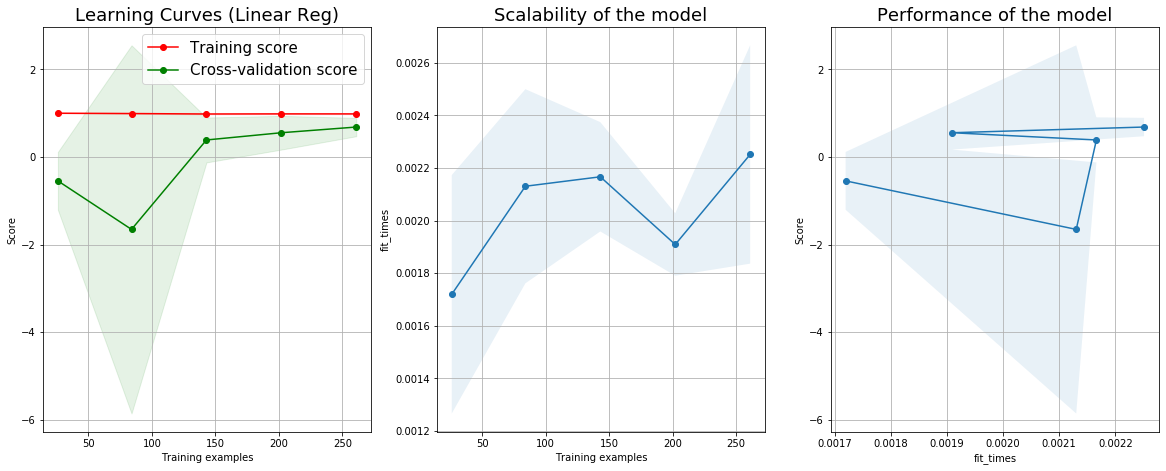

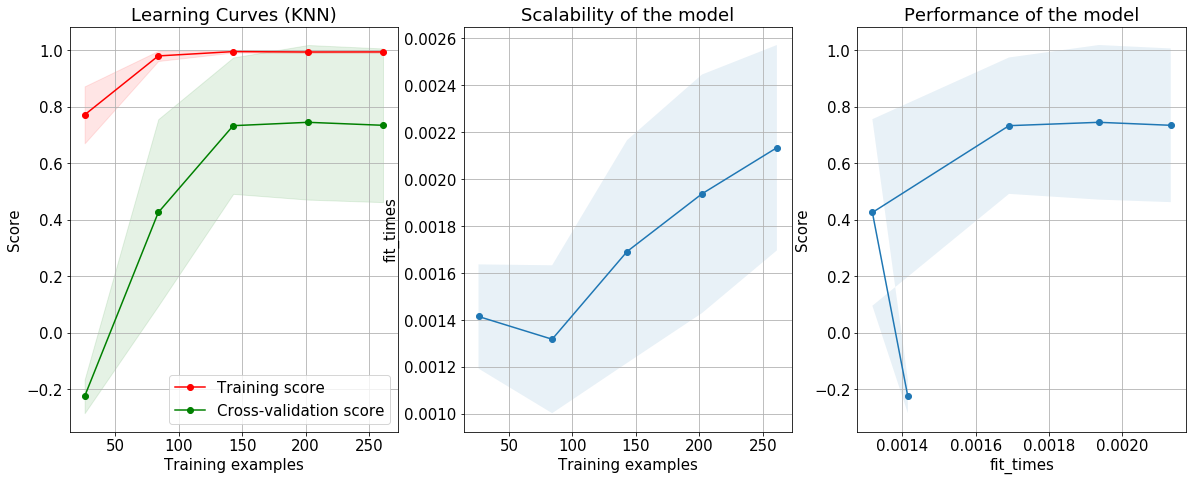

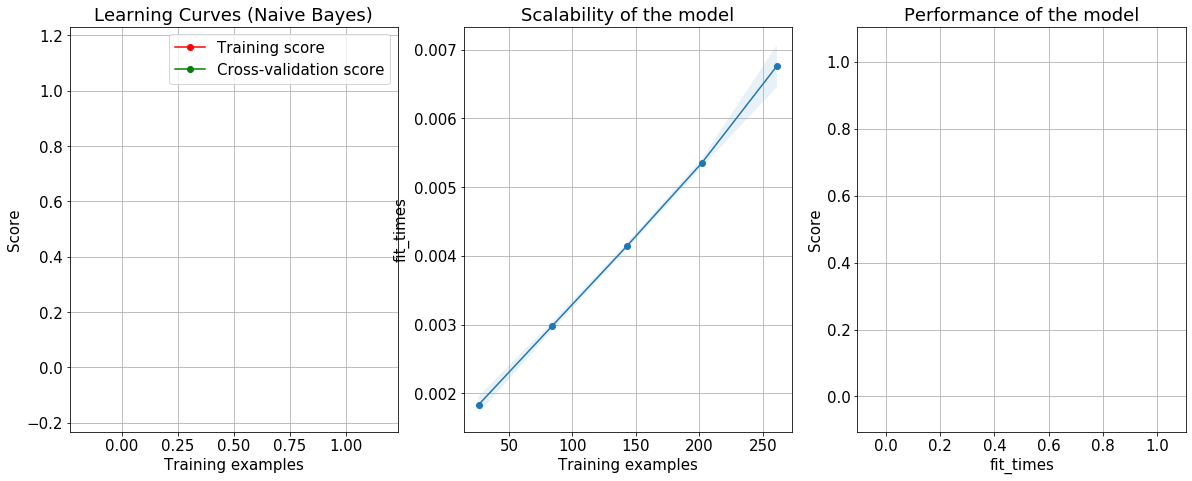

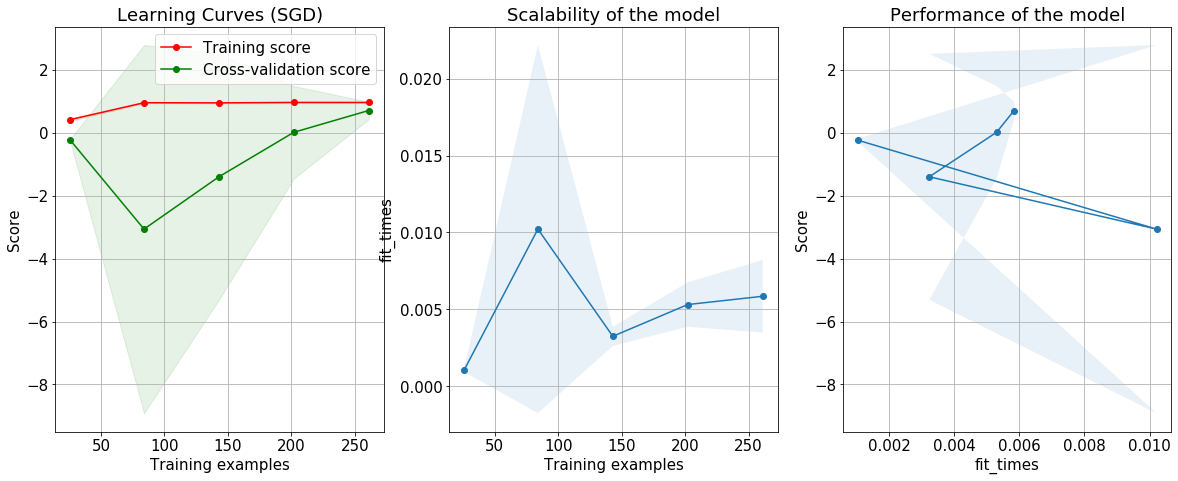

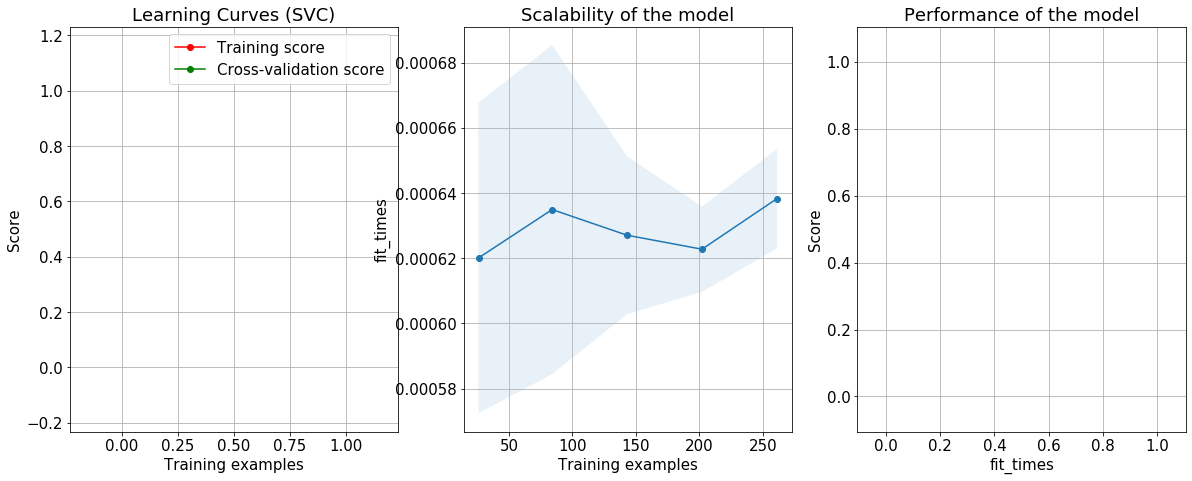

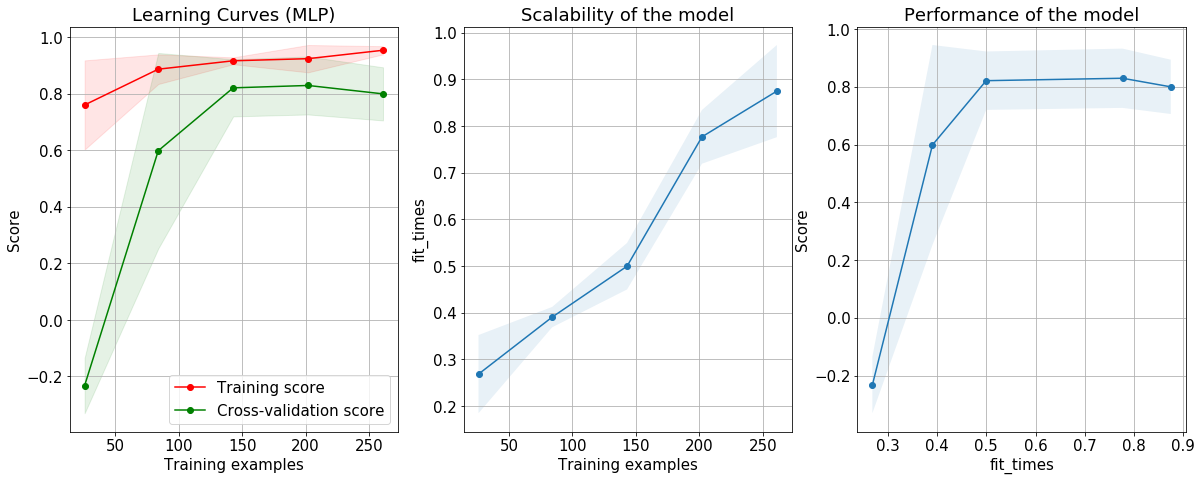

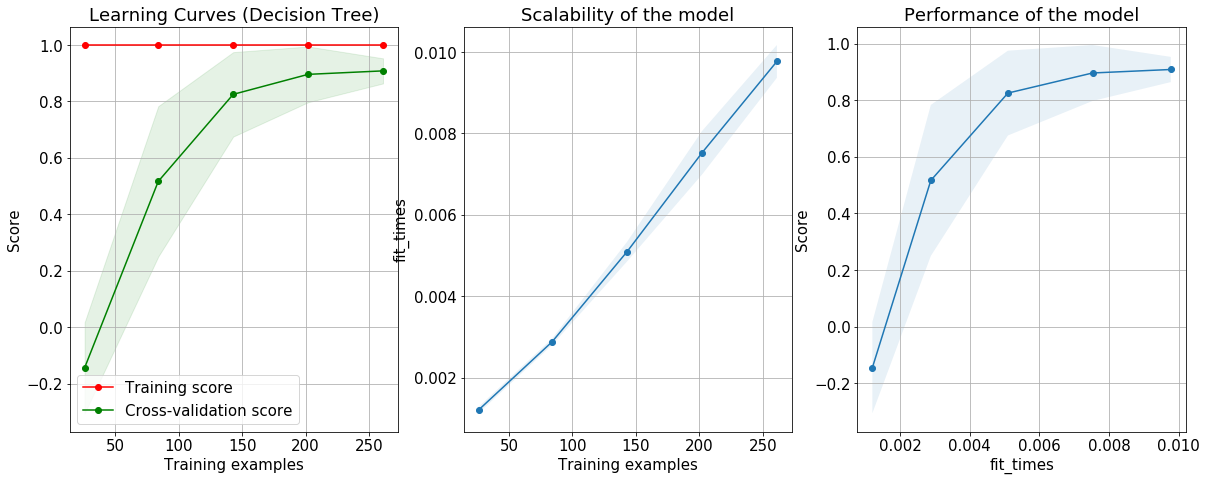

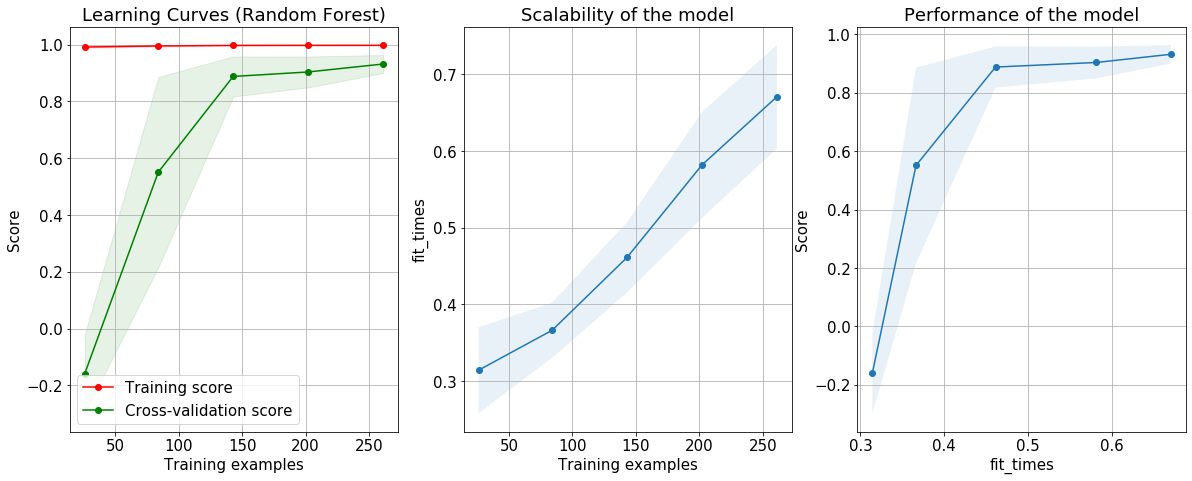

In [15]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(models)):    
    plot_learning_curve(estimator=models[i],
                    title=titles[i],
                    X=all_features,
                    y=all_labels,
                    groups=all_groups,
                    cv=group_kfold,
                    scoring='r2')

SPLIT 1


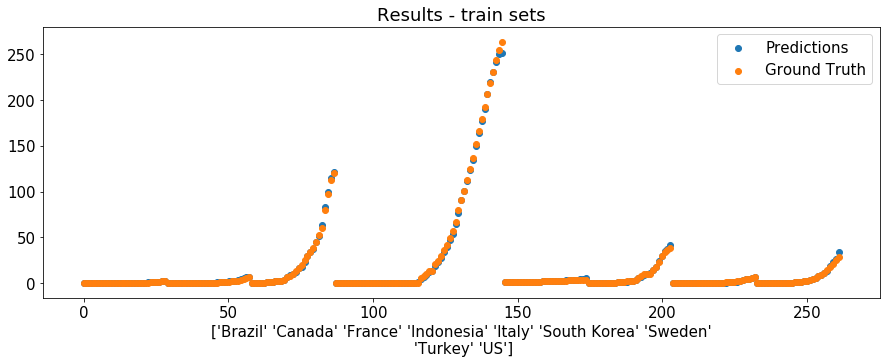

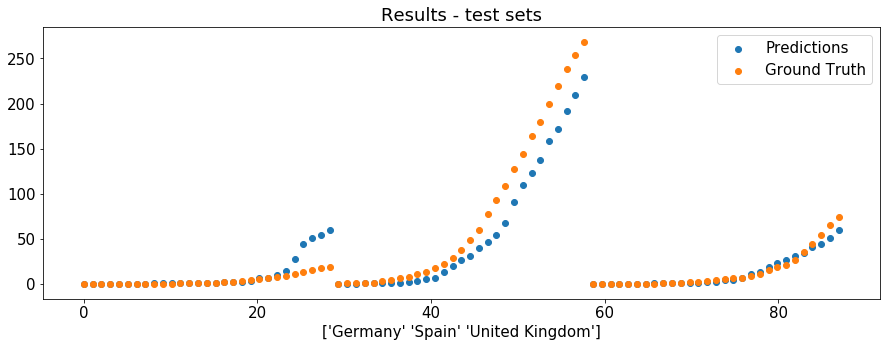

SPLIT 2


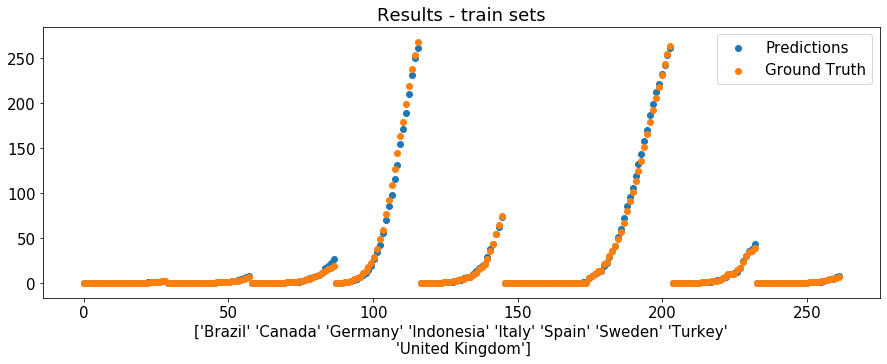

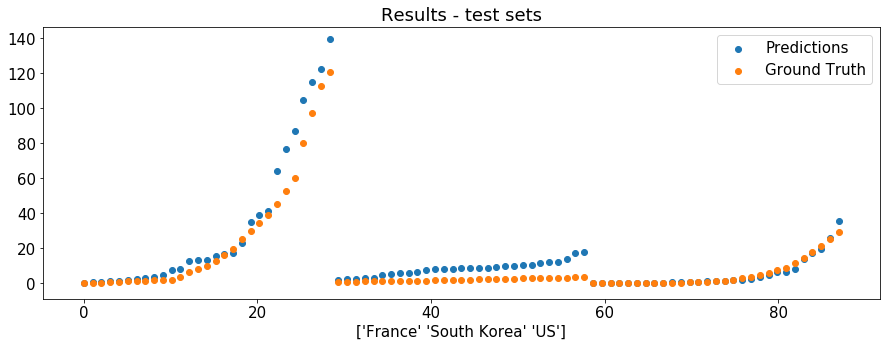

SPLIT 3


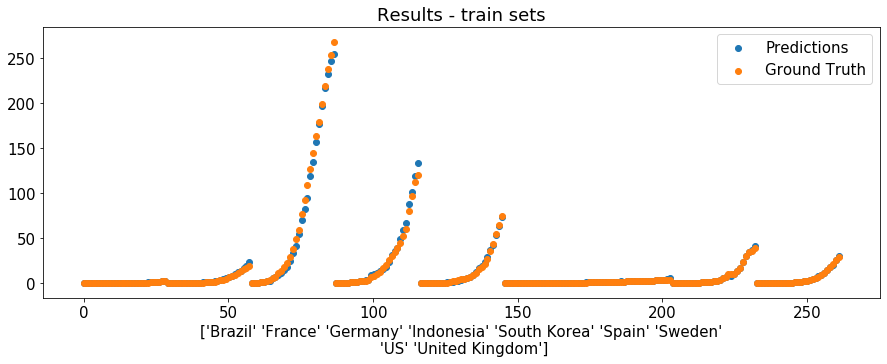

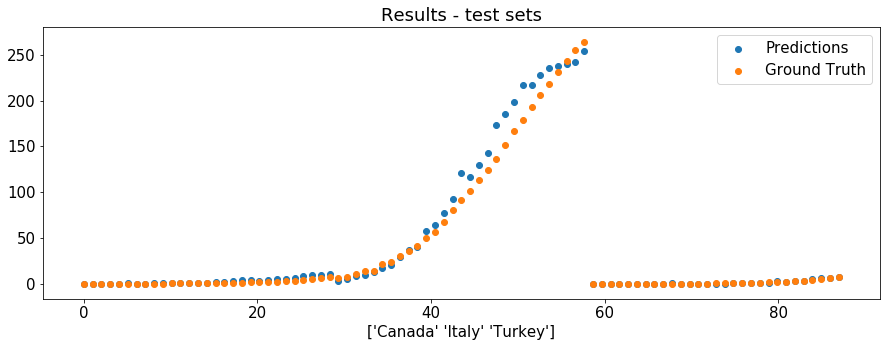

SPLIT 4


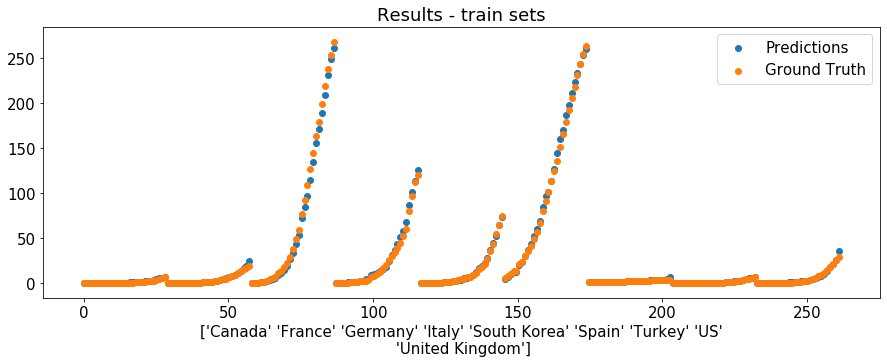

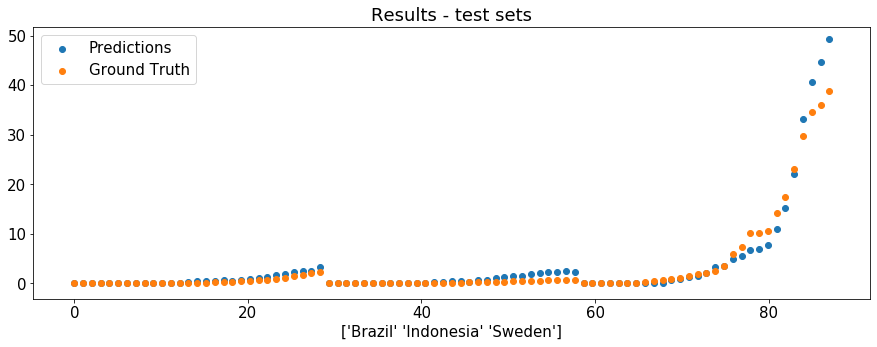

In [19]:
train_r2scores=[]
test_r2scores=[]
train_mse_scores=[]
test_mse_scores=[]
train_maxerror_scores=[]
test_maxerror_scores=[]
train_mae_scores=[]
test_mae_scores=[]

train_r2scores_scaled=[]
test_r2scores_scaled=[]
test_mae_scores_scaled=[]
train_mse_scores_scaled=[]
test_mse_scores_scaled=[]
train_maxerror_scores_scaled=[]
test_maxerror_scores_scaled=[]
train_mae_scores_scaled=[]

counter=1

for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    print("SPLIT", counter)
    counter+=1
    
    #Train set
    train_countries=np.unique(np.array(second_data.iloc[train_idx]["country"]))
    X_train=all_features[train_idx]
    y_train=all_labels[train_idx]
    
    #Test & Validation set
    test_countries=np.unique(np.array(second_data.iloc[test_idx]["country"]))
    X_test=all_features[test_idx]
    y_test=all_labels[test_idx]

    #Scaling the data 
    scaler=StandardScaler()    
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    model=RandomForestRegressor()
    model.fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    
    #Scale the predicted and label values to [0,1] range
    scaler_l=MinMaxScaler()
    #y
    y_train_scaled=y_train.reshape(-1,1)
    y_train_scaled=scaler_l.fit_transform(y_train_scaled)
    y_train_scaled=y_train_scaled.reshape(-1)
    
    y_test_scaled=y_test.reshape(-1,1)
    y_test_scaled=scaler_l.fit_transform(y_test_scaled)
    y_test_scaled=y_test_scaled.reshape(-1)
    #pred
    predictions_train_scaled=predictions_train.reshape(-1,1)
    predictions_train_scaled=scaler_l.fit_transform(predictions_train_scaled)
    predictions_train_scaled=predictions_train_scaled.reshape(-1)       
    
    predictions_test_scaled=predictions_test.reshape(-1,1)
    predictions_test_scaled=scaler_l.fit_transform(predictions_test_scaled)
    predictions_test_scaled=predictions_test_scaled.reshape(-1)
      
        
    #Calculate values of metrics
    #Non-scaled
    r2_train=r2_score(y_train,predictions_train)
    r2_test=r2_score(y_test,predictions_test)
    
    mse_train=mse(y_train,predictions_train)
    mse_test=mse(y_test,predictions_test)
    
    me_train=max_error(y_train,predictions_train)
    me_test=max_error(y_test,predictions_test)
    
    mae_train=mean_absolute_error(y_train,predictions_train)
    mae_test=mean_absolute_error(y_test,predictions_test)    
    
    #Scaled
    r2_train_scaled=r2_score(y_train_scaled,predictions_train_scaled)
    r2_test_scaled=r2_score(y_test_scaled,predictions_test_scaled)
    
    mse_train_scaled=mse(y_train_scaled,predictions_train_scaled)
    mse_test_scaled=mse(y_test_scaled,predictions_test_scaled)
    
    me_train_scaled=max_error(y_train_scaled,predictions_train_scaled)
    me_test_scaled=max_error(y_test_scaled,predictions_test_scaled)
    
    mae_train_scaled=mean_absolute_error(y_train_scaled,predictions_train_scaled)
    mae_test_scaled=mean_absolute_error(y_test_scaled,predictions_test_scaled)  
    
    
    #Save results
    #Non-scaled
    train_r2scores.append(round(r2_train,4))
    test_r2scores.append(round(r2_test,4))
    
    train_mse_scores.append(round(mse_train,4))
    test_mse_scores.append(round(mse_test,4))
    
    train_maxerror_scores.append(round(me_train,4))
    test_maxerror_scores.append(round(me_test,4))
    
    train_mae_scores.append(round(mae_train,4))
    test_mae_scores.append(round(mae_test,4))
    
    #Scaled
    train_r2scores_scaled.append(round(r2_train_scaled,4))
    test_r2scores_scaled.append(round(r2_test_scaled,4))
    
    train_mse_scores_scaled.append(round(mse_train_scaled,4))
    test_mse_scores_scaled.append(round(mse_test_scaled,4))
    
    train_maxerror_scores_scaled.append(round(me_train_scaled,4))
    test_maxerror_scores_scaled.append(round(me_test_scaled,4))
    
    train_mae_scores_scaled.append(round(mae_train_scaled,4))
    test_mae_scores_scaled.append(round(mae_test_scaled,4))
    
    
        
    #Plot unscaled train results
    fig=plt.figure(figsize=(15,5))
    x=np.linspace(0,len(predictions_train),len(predictions_train))
    plt.scatter(x,predictions_train,label="Predictions")
    plt.scatter(x,y_train,label="Ground Truth")
    plt.xlabel(str(train_countries))
    plt.legend()
    plt.title("Results - train sets")
    plt.show()
    
    
    #Plot unscaled test results
    fig=plt.figure(figsize=(15,5))
    x=np.linspace(0,len(predictions_test),len(predictions_test))
    plt.scatter(x,predictions_test,label="Predictions")
    plt.scatter(x,y_test,label="Ground Truth")
    plt.xlabel(str(test_countries))
    plt.legend()
    plt.title("Results - test sets")
    plt.show()
    
    
    
results_train=pd.DataFrame(list(zip(train_r2scores,train_r2scores_scaled,train_mse_scores,train_mse_scores_scaled,train_maxerror_scores,train_maxerror_scores_scaled,train_mae_scores,train_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])

results_test=pd.DataFrame(list(zip(test_r2scores,test_r2scores_scaled,test_mse_scores,test_mse_scores_scaled,test_maxerror_scores,test_maxerror_scores_scaled,test_mae_scores,test_mae_scores_scaled)),
                          columns=["R2","R2_s","MSE","MSE_s","ME","ME_s","MAE","MAE_s"])




### Results train

In [20]:
results_train

,R2,R2_s,MSE,MSE_s,ME,ME_s,MAE,MAE_s
0,0.9993,0.9976,1.4169,0.0001,12.6193,0.0469,0.4592,0.0032
1,0.9979,0.9975,6.7371,0.0001,12.8119,0.0457,1.1222,0.0046
2,0.9966,0.9957,5.6736,0.0001,14.6405,0.0763,0.9290,0.0040
3,0.9978,0.9972,7.1429,0.0001,12.5116,0.0478,1.2743,0.0054


In [22]:
results_train.describe()

,R2,R2_s,MSE,MSE_s,ME,ME_s,MAE,MAE_s
count,4.000000,4.000000,4.000000,4.0000,4.000000,4.000000,4.000000,4.000000
mean,0.997900,0.997000,5.242625,0.0001,13.145825,0.054175,0.946175,0.004300
std,0.001105,0.000883,2.624653,0.0000,1.004163,0.014775,0.354067,0.000931
min,0.996600,0.995700,1.416900,0.0001,12.511600,0.045700,0.459200,0.003200
25%,0.997500,0.996825,4.609425,0.0001,12.592375,0.046600,0.811550,0.003800
50%,0.997850,0.997350,6.205350,0.0001,12.715600,0.047350,1.025600,0.004300
75%,0.998250,0.997525,6.838550,0.0001,13.269050,0.054925,1.160225,0.004800
max,0.999300,0.997600,7.142900,0.0001,14.640500,0.076300,1.274300,0.005400


### Results test

In [23]:
results_test

,R2,R2_s,MSE,MSE_s,ME,ME_s,MAE,MAE_s
0,0.9194,0.9574,312.8723,0.0023,48.0649,0.1920,9.7249,0.0253
1,0.9013,0.9605,54.6572,0.0015,26.5706,0.1233,4.6403,0.0271
2,0.9786,0.9669,104.8455,0.0023,38.2557,0.1779,4.9804,0.0225
3,0.9443,0.9627,3.5417,0.0016,10.4486,0.1462,0.8548,0.0185


In [24]:
results_test.describe()

,R2,R2_s,MSE,MSE_s,ME,ME_s,MAE,MAE_s
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.935900,0.961875,118.979175,0.001925,30.834950,0.159850,5.050100,0.023350
std,0.033483,0.003994,135.717147,0.000435,16.183599,0.030993,3.634423,0.003747
min,0.901300,0.957400,3.541700,0.001500,10.448600,0.123300,0.854800,0.018500
25%,0.914875,0.959725,41.878325,0.001575,22.540100,0.140475,3.693925,0.021500
50%,0.931850,0.961600,79.751350,0.001950,32.413150,0.162050,4.810350,0.023900
75%,0.952875,0.963750,156.852200,0.002300,40.708000,0.181425,6.166525,0.025750
max,0.978600,0.966900,312.872300,0.002300,48.064900,0.192000,9.724900,0.027100


Predicting the fatalities using a large temporal analysis of the number of them plus the number of cases allows the model to generalize well, as we can see through the charts of the test sets and the tables above.

## Conclusion

Throughout this project, we have taken a dataset about the covid-19 mobility reports, number of cases and fatalities amongst different countries, in which we preformed various machine learning regression problems in order to predict either the number of cases or the fatalities.

Preforming this tasks allowed us to understand how this type of data can be modeled by some algorithms presents in the Scikit-Learn library. Dealing with time series problems was a challenge that concede us the prespective of how the model can learn the best, when more temporal data is provided as feature, normally, generalization and scalability of the problem increases. 

Dimensionality reduction and feature selection was an advantageous task to figure out how some features can be reduced, in the first case, and deleted, in the second, in order to improve generalization of the models.

Concerning the prediction of the total cases of covid-19 in the different problems, as expected, when using as feature the number of total cases in the previous day, errors are very low. This happen because the gradient for 1 day difference is not to high, that is, there's not a high increase of cases from one day to another. For more difficult tasks, where the temporal gap between the features and the prediction we are trying to make is of one week, best results were the ones computed in the fourth problem, where features as the total number of cases in severel previous days (with one week gap always) were used.

For the fatalities, considering all the knowledge learned from the other problems, the results obtained were satisfying as they have very low errors.